<b>Assignment on Linear Regression:</b>
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

In [2]:
import numpy as np

In [3]:
X_driving_hours = [10, 9, 2, 15, 10, 16, 11, 16]
y_risk_score = [95, 80, 10, 50, 45, 98, 38, 93]

In [4]:
import matplotlib.pyplot as plt

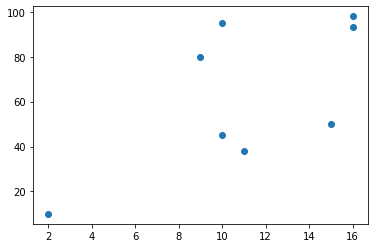

In [5]:
plt.plot(X_driving_hours, y_risk_score, "o")

1. Finding coefficients b0, b1 that satisfy the equation y = b1x + b0 for given data

In [6]:
# helper functions
def mean(values):
    return sum(values) / float(len(values))
 
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [7]:
def find_coefficients(x, y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [8]:
b0, b1 = find_coefficients(X_driving_hours, y_risk_score)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=12.585, B1=4.588


The equation for the given data (in the form y = b0 + b1x)
<b> y = 12.585 + 4.588x

In [9]:
from sklearn.linear_model import LinearRegression
X = np.array(X_driving_hours).reshape(-1, 1) 
y = np.array(y_risk_score).reshape(-1, 1) 
lm = LinearRegression().fit(X, y)
lm.coef_

array([[4.58789861]])

In [10]:
lm.intercept_

array([12.58462796])

In [11]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

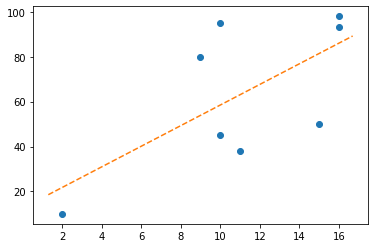

In [12]:
plt.plot(X_driving_hours, y_risk_score, "o")
abline(b1, b0)

2. Prediction

In [13]:
def linear_regression(X_train, y_train, X_test):
    predictions = list()
    b0, b1 = find_coefficients(X_train, y_train)
    for row in X_test:
        yhat = b0 + b1 * row
        predictions.append(yhat)
    return predictions

In [14]:
# Calculate Root Mean Squared Error
from math import sqrt
def calc_rmse(actual, predicted):
    sum_err = 0.0
    for i in range(len(actual)):
        pred_err = predicted[i] - actual[i]
        sum_err += (pred_err ** 2)
    mean_err = sum_err / float(len(actual))
    return sqrt(mean_err)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_driving_hours, y_risk_score, test_size=1/3, random_state=0)

In [16]:
predictions = linear_regression(X_train, Y_train, X_test)
rmse = calc_rmse(Y_test, predictions)
rmse

29.547856861944695

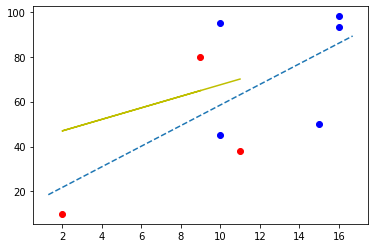

In [17]:
plt.plot(X_train, Y_train, "bo")
plt.plot(X_test, Y_test, "ro")
plt.plot(X_test, predictions, "y")
plt.plot()
abline(b1, b0)
plt.show()

The above graph indicates the following:
- Blue Dots: Training samples
- Red Dots: Testing samples
- Blue Dashed Line: best fit line
- Yellow Line: predicted output best fit line